In [295]:
import pandas as pd
import sqlalchemy as db
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway,chi2_contingency

## Connection a la database

In [296]:
engine = db.create_engine("sqlite:///db.sqlite")
connection = engine.connect()

## Creation des dataframe avec pandas


In [297]:
sql=""" 
SELECT * FROM LostItem
JOIN Gare ON LostItem.code_uic_gare_origine = Gare.code_uic


"""
df = pd.read_sql(sql,con=engine)
df_temp = pd.read_sql_table("Temperature",con=engine)


In [298]:
df

,id,code_uic_gare_origine,date,type_objet,gare,date_restitution,id,code_uic,nom_gare,code_postal,code_commune,code_departement,departement,longitude,latitude
0,63da55f845a9723f14bf582ac1b9d891bde58ec1,0087723197,2016-01-01T05:29:11+00:00,"Bagagerie: sacs, valises, cartables",Lyon Part Dieu,None,eea1167107ee6d8208582f6be7cd0f9ca281cbce,0087723197,Lyon Part Dieu,69003,123,69,Rhône,4.859355,45.760559
1,541c4c8eeb0fdc37d432c82c3bc24e0cfadb2350,0087755009,2016-01-01T05:37:52+00:00,"Bagagerie: sacs, valises, cartables",Toulon,None,dd83934bb30804fe20c7a43a2802c12a1bc6c97b,0087755009,Toulon,83000,137,83,Var,5.929293,43.128370
2,9fc76f9590e95aa10556051285b76cc38a59695a,0087576207,2016-01-01T06:19:40+00:00,"Porte-monnaie / portefeuille, argent, titres",Bourges,None,a88bc09afdcca3336fff8395b85eda5a063be32a,0087576207,Bourges,18000,033,18,Cher,2.394255,47.094145
3,c1cde2fdb88372413bd5daf5113981c08a7b7012,0087111849,2016-01-01T06:31:15+00:00,"Appareils électroniques, informatiques, appare...",Marne-la-Vallée Chessy,2016-01-03T17:15:09+00:00,eb9b3a50ca0690c7d88a69ca8fe6b24965b71182,0087111849,Marne-la-Vallée Chessy,77111,111,77,Seine-et-Marne,2.782720,48.869856
4,28619cf21142ad6b549201020bea6f93263b4268,0087111849,2016-01-01T06:44:54+00:00,"Porte-monnaie / portefeuille, argent, titres",Marne-la-Vallée Chessy,None,eb9b3a50ca0690c7d88a69ca8fe6b24965b71182,0087111849,Marne-la-Vallée Chessy,77111,111,77,Seine-et-Marne,2.782720,48.869856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481112,1cbb7e736df918acb71d0e227d5b6643da7299e3,0087543017,2021-12-31T21:39:32+00:00,"Bagagerie: sacs, valises, cartables",Les Aubrais,None,255ad1d4ef04d016bc7e64f33e204c431f6261d7,0087543017,Les Aubrais,45400,147,45,Loiret,1.906629,47.926801
481113,35943f49e3fb5f9f36d82e1f34975b3c09a7159e,0087384008,2021-12-31T22:19:47+00:00,"Bagagerie: sacs, valises, cartables",Paris Saint-Lazare,2022-01-08T10:50:12+00:00,aec160f097233f45cb9ffa9e773fff13b19325a9,0087384008,Paris Saint-Lazare,75008,056,75,Paris,2.325331,48.876242
481114,60ef0c8ce7ee2c9b7722f58623ac76f1f947961e,0087384008,2021-12-31T22:23:27+00:00,"Bagagerie: sacs, valises, cartables",Paris Saint-Lazare,None,aec160f097233f45cb9ffa9e773fff13b19325a9,0087384008,Paris Saint-Lazare,75008,056,75,Paris,2.325331,48.876242
481115,8107cd28f611cb7d2c027597e94954ed761ea1c2,0087384008,2021-12-31T22:25:34+00:00,"Bagagerie: sacs, valises, cartables",Paris Saint-Lazare,None,aec160f097233f45cb9ffa9e773fff13b19325a9,0087384008,Paris Saint-Lazare,75008,056,75,Paris,2.325331,48.876242


## Convertion des dates dans un même format

In [299]:
df['date'] = pd.to_datetime(df['date'])
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

In [300]:
df_temp["departement_code"] = df_temp["departement_code"].astype(str).str.zfill(2)

In [301]:
# df['date'] = df['date'].dt.tz_convert(None)

In [302]:
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [303]:
df['date'] = pd.to_datetime(df['date'])

## Merge du dataframe des sobjet perdu et des infos des gares avec le dataframe des temperatures

In [304]:
merge =pd.merge(df,df_temp,left_on=["code_departement","date"],right_on=["departement_code","Date"])

In [305]:
merge

,id,code_uic_gare_origine,date,type_objet,gare,date_restitution,id,code_uic,nom_gare,code_postal,code_commune,code_departement,departement,longitude,latitude,index,departement_code,Date,temperature
0,63da55f845a9723f14bf582ac1b9d891bde58ec1,0087723197,2016-01-01,"Bagagerie: sacs, valises, cartables",Lyon Part Dieu,None,eea1167107ee6d8208582f6be7cd0f9ca281cbce,0087723197,Lyon Part Dieu,69003,123,69,Rhône,4.859355,45.760559,56992,69,2016-01-01,6.7625
1,4df93f7f4e5a439eae8635af8f8af826748d2c51,0087723197,2016-01-01,"Clés, porte-clés, badge magnétique",Lyon Part Dieu,2016-01-01T09:37:39+00:00,eea1167107ee6d8208582f6be7cd0f9ca281cbce,0087723197,Lyon Part Dieu,69003,123,69,Rhône,4.859355,45.760559,56992,69,2016-01-01,6.7625
2,528829485156b2af819a1c1172d5a7bf90cd78c1,0087723197,2016-01-01,"Appareils électroniques, informatiques, appare...",Lyon Part Dieu,None,eea1167107ee6d8208582f6be7cd0f9ca281cbce,0087723197,Lyon Part Dieu,69003,123,69,Rhône,4.859355,45.760559,56992,69,2016-01-01,6.7625
3,d76d9a2ca5f79fcbc68faf1b01b48d4c934813b1,0087723197,2016-01-01,"Porte-monnaie / portefeuille, argent, titres",Lyon Part Dieu,2016-01-14T13:14:03+00:00,eea1167107ee6d8208582f6be7cd0f9ca281cbce,0087723197,Lyon Part Dieu,69003,123,69,Rhône,4.859355,45.760559,56992,69,2016-01-01,6.7625
4,43ec098026a4da0174b9da9bf09f9a57b8e4bb7e,0087723197,2016-01-01,"Livres, articles de papéterie",Lyon Part Dieu,None,eea1167107ee6d8208582f6be7cd0f9ca281cbce,0087723197,Lyon Part Dieu,69003,123,69,Rhône,4.859355,45.760559,56992,69,2016-01-01,6.7625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265230,66791f85045722a40d839a4f15ac72fe2db9c7cf,0087611004,2021-12-31,"Bagagerie: sacs, valises, cartables",Toulouse Matabiau,2022-09-01T11:24:13+00:00,6d8b1972b89253bad7fa7e39fa9eb91e46813200,0087611004,Toulouse Matabiau,31500,555,31,Haute-Garonne,1.453616,43.611206,24111,31,2021-12-31,9.3000
265231,9e8badffe7a1e77a1bc77f36851e63f07fd758d9,0087611004,2021-12-31,"Bagagerie: sacs, valises, cartables",Toulouse Matabiau,2022-01-11T08:54:55+00:00,6d8b1972b89253bad7fa7e39fa9eb91e46813200,0087611004,Toulouse Matabiau,31500,555,31,Haute-Garonne,1.453616,43.611206,24111,31,2021-12-31,9.3000
265232,fb7b9ddf2dd06a641a68fde738ac2e93b7b7adeb,0087611004,2021-12-31,"Bagagerie: sacs, valises, cartables",Toulouse Matabiau,2022-01-05T08:40:50+00:00,6d8b1972b89253bad7fa7e39fa9eb91e46813200,0087611004,Toulouse Matabiau,31500,555,31,Haute-Garonne,1.453616,43.611206,24111,31,2021-12-31,9.3000
265233,ab6517fe6585bdce9ed4f17201941a5a46047a8c,0087611004,2021-12-31,"Vêtements, chaussures",Toulouse Matabiau,2022-01-05T08:38:41+00:00,6d8b1972b89253bad7fa7e39fa9eb91e46813200,0087611004,Toulouse Matabiau,31500,555,31,Haute-Garonne,1.453616,43.611206,24111,31,2021-12-31,9.3000


In [306]:
merge.columns

Index(['id', 'code_uic_gare_origine', 'date', 'type_objet', 'gare',
       'date_restitution', 'id', 'code_uic', 'nom_gare', 'code_postal',
       'code_commune', 'code_departement', 'departement', 'longitude',
       'latitude', 'index', 'departement_code', 'Date', 'temperature'],
      dtype='object')

In [307]:
merge = merge[[ 'date', 'type_objet', 'gare','code_departement', 'departement', 'longitude','latitude','temperature']]

In [308]:
merge

,date,type_objet,gare,code_departement,departement,longitude,latitude,temperature
0,2016-01-01,"Bagagerie: sacs, valises, cartables",Lyon Part Dieu,69,Rhône,4.859355,45.760559,6.7625
1,2016-01-01,"Clés, porte-clés, badge magnétique",Lyon Part Dieu,69,Rhône,4.859355,45.760559,6.7625
2,2016-01-01,"Appareils électroniques, informatiques, appare...",Lyon Part Dieu,69,Rhône,4.859355,45.760559,6.7625
3,2016-01-01,"Porte-monnaie / portefeuille, argent, titres",Lyon Part Dieu,69,Rhône,4.859355,45.760559,6.7625
4,2016-01-01,"Livres, articles de papéterie",Lyon Part Dieu,69,Rhône,4.859355,45.760559,6.7625
...,...,...,...,...,...,...,...,...
265230,2021-12-31,"Bagagerie: sacs, valises, cartables",Toulouse Matabiau,31,Haute-Garonne,1.453616,43.611206,9.3000
265231,2021-12-31,"Bagagerie: sacs, valises, cartables",Toulouse Matabiau,31,Haute-Garonne,1.453616,43.611206,9.3000
265232,2021-12-31,"Bagagerie: sacs, valises, cartables",Toulouse Matabiau,31,Haute-Garonne,1.453616,43.611206,9.3000
265233,2021-12-31,"Vêtements, chaussures",Toulouse Matabiau,31,Haute-Garonne,1.453616,43.611206,9.3000


## Creation du dataframe pour realiser un scatter plot

In [309]:
df_scatter = pd.DataFrame(merge[["temperature","departement"]].groupby("temperature").count().reset_index())

In [310]:
df_scatter.rename(columns = {'departement':'nombre_objet_perdu_par_mois'}, inplace = True)

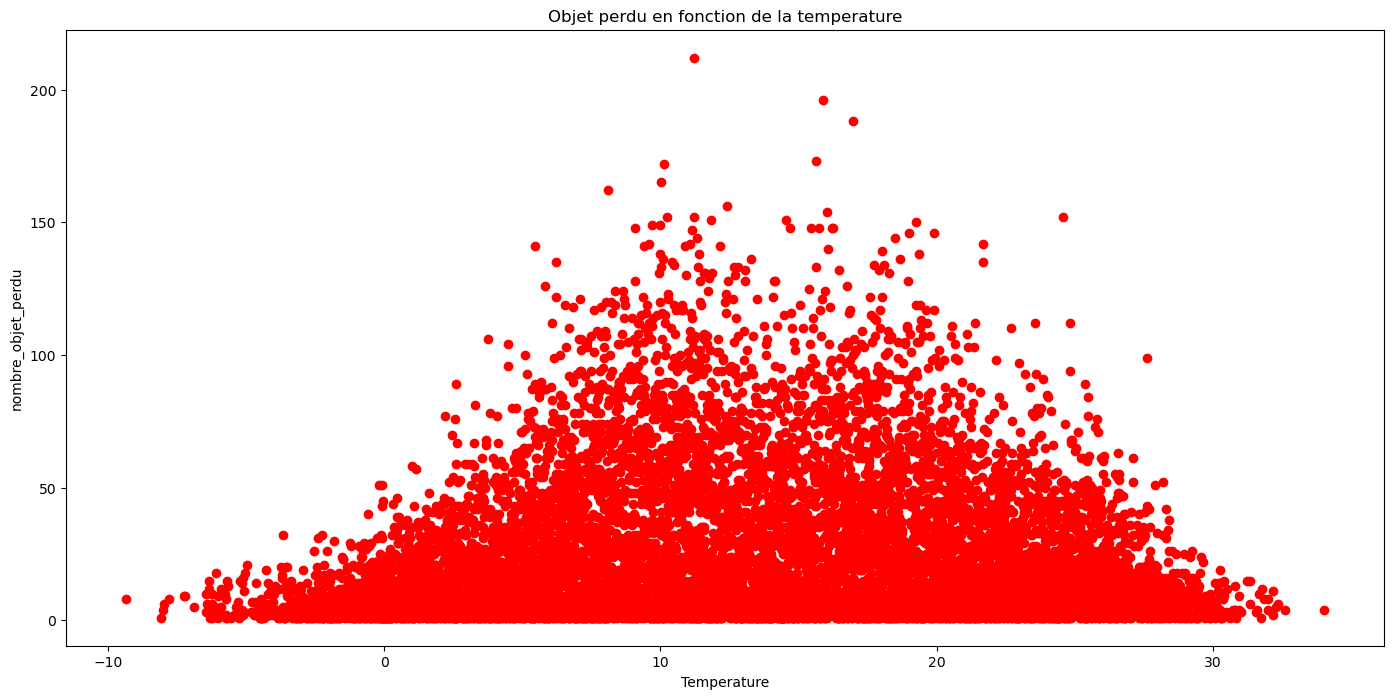

In [311]:
# Create the scatterplot with custom marker size, color, and transparency
plt.figure(figsize=(17,8))
plt.scatter(df_scatter["temperature"], df_scatter["nombre_objet_perdu_par_mois"], c='red')

# Add a title and axis labels
plt.title('Objet perdu en fonction de la temperature')
plt.xlabel('Temperature')
plt.ylabel('nombre_objet_perdu')
plt.show()

In [312]:
df_scatter.corr()

,temperature,nombre_objet_perdu_par_mois
temperature,1.000000,0.044061
nombre_objet_perdu_par_mois,0.044061,1.000000


In [313]:
def mois_en_saison(month):
    if month in [12,1,2]:
        return "hiver"
    if month in [3,4,5]:
        return "printemps"
    if month in [6,7,8]:
        return "ete"
    if month in [9,10,11]:
        return "automne"


In [314]:
merge["saison"] = merge["date"].dt.month.apply(lambda x:mois_en_saison(x))

/tmp/ipykernel_5181/3442516572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge["saison"] = merge["date"].dt.month.apply(lambda x:mois_en_saison(x))


In [315]:
df_saison=pd.DataFrame(merge[["date","saison","type_objet"]].groupby([pd.Grouper(key='date', freq='D'),"saison"]).count().reset_index())
df_saison.rename(columns = {'type_objet':'nombre_objet_par_jour'}, inplace = True)

In [316]:
df_saison

,date,saison,nombre_objet_par_jour
0,2016-01-01,hiver,54
1,2016-01-02,hiver,63
2,2016-01-03,hiver,86
3,2016-01-04,hiver,193
4,2016-01-05,hiver,101
...,...,...,...
2152,2021-12-27,hiver,133
2153,2021-12-28,hiver,106
2154,2021-12-29,hiver,94
2155,2021-12-30,hiver,111


In [317]:
df_saison[df_saison["saison"]=="hiver"]["nombre_objet_par_jour"].median()

112.5

In [318]:
df_saison[df_saison["saison"]=="printemps"]["nombre_objet_par_jour"].median()

109.0

In [319]:
df_saison[df_saison["saison"]=="ete"]["nombre_objet_par_jour"].median()

133.0

In [320]:
df_saison[df_saison["saison"]=="automne"]["nombre_objet_par_jour"].median()

125.0

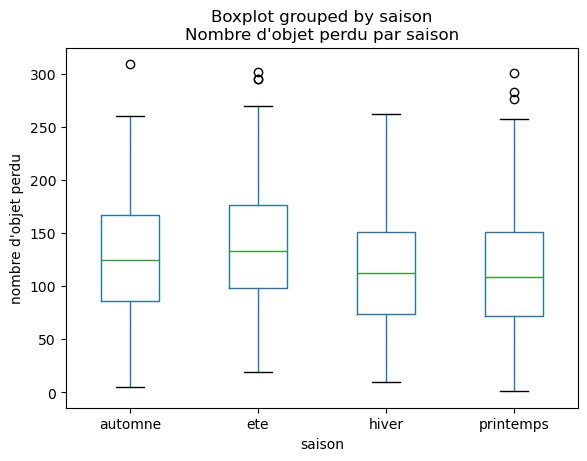

In [321]:
df_saison.boxplot('nombre_objet_par_jour', by='saison', grid=False)
plt.title( "Nombre d'objet perdu par saison" )
plt.ylabel("nombre d'objet perdu")
plt.xlabel('saison')

plt.show()

In [322]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))
# ax1.boxplot(df_saison[df_saison["saison"]=="hiver"]["nombre_objet_par_jour"])
# ax1.set_title('Boxplot saison : hiver ')
# ax1.set_xlabel('saison')
# ax1.set_ylabel("nombre d'objet perdu")
# # Création de la deuxième figure
# ax2.boxplot(df_saison[df_saison["saison"]=="printemps"]["nombre_objet_par_jour"])
# ax2.set_title('Boxplot saison : printemps')
# ax2.set_xlabel('saison')
# ax2.set_ylabel("nombre d'objet perdu")
# # Création de la troisième figure
# ax3.boxplot(df_saison[df_saison["saison"]=="ete"]["nombre_objet_par_jour"])
# ax3.set_title('Boxplot saison : ete')
# ax3.set_xlabel('saison')
# ax3.set_ylabel("nombre d'objet perdu")
# # Création de la quatrième figure
# ax4.boxplot(df_saison[df_saison["saison"]=="automne"]["nombre_objet_par_jour"])
# ax4.set_title('Boxplot saison : automne')
# ax4.set_xlabel('saison')
# ax4.set_ylabel("nombre d'objet perdu")
# # Affichage des figures
# plt.show()

In [323]:
f_statistic, p_value = f_oneway(df_saison[df_saison["saison"]=="hiver"]["nombre_objet_par_jour"], df_saison[df_saison["saison"]=="printemps"]["nombre_objet_par_jour"], df_saison[df_saison["saison"]=="ete"]["nombre_objet_par_jour"],df_saison[df_saison["saison"]=="automne"]["nombre_objet_par_jour"])

In [324]:
print(f"F-statistic: {f_statistic:.3f}, p-value: {p_value:.6f}")

F-statistic: 27.493, p-value: 0.000000


In [325]:
df_saison

,date,saison,nombre_objet_par_jour
0,2016-01-01,hiver,54
1,2016-01-02,hiver,63
2,2016-01-03,hiver,86
3,2016-01-04,hiver,193
4,2016-01-05,hiver,101
...,...,...,...
2152,2021-12-27,hiver,133
2153,2021-12-28,hiver,106
2154,2021-12-29,hiver,94
2155,2021-12-30,hiver,111


(array([ 28.,  22.,  28.,  59.,  64.,  78., 120., 138., 146., 148., 149.,
        147., 128., 130., 154., 146., 116.,  87.,  63.,  60.,  48.,  30.,
         25.,  20.,   8.,   6.,   3.,   1.,   2.,   3.]),
 array([  1.        ,  11.26666667,  21.53333333,  31.8       ,
         42.06666667,  52.33333333,  62.6       ,  72.86666667,
         83.13333333,  93.4       , 103.66666667, 113.93333333,
        124.2       , 134.46666667, 144.73333333, 155.        ,
        165.26666667, 175.53333333, 185.8       , 196.06666667,
        206.33333333, 216.6       , 226.86666667, 237.13333333,
        247.4       , 257.66666667, 267.93333333, 278.2       ,
        288.46666667, 298.73333333, 309.        ]),
 <BarContainer object of 30 artists>)

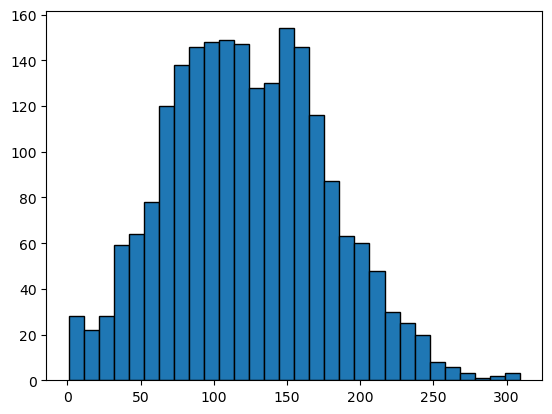

In [326]:
plt.hist(df_saison['nombre_objet_par_jour'], edgecolor='black', bins=30)

In [327]:
df_mois=pd.DataFrame(merge[["date","type_objet"]].groupby([pd.Grouper(key='date', freq='D')]).count().reset_index())
df_mois.rename(columns = {'type_objet':'nombre_objet_perdu_par_jour'}, inplace = True)

In [328]:
df_mois

,date,nombre_objet_perdu_par_jour
0,2016-01-01,54
1,2016-01-02,63
2,2016-01-03,86
3,2016-01-04,193
4,2016-01-05,101
...,...,...
2187,2021-12-27,133
2188,2021-12-28,106
2189,2021-12-29,94
2190,2021-12-30,111


In [329]:
df_mois["mois"] = df_mois['date'].dt.month

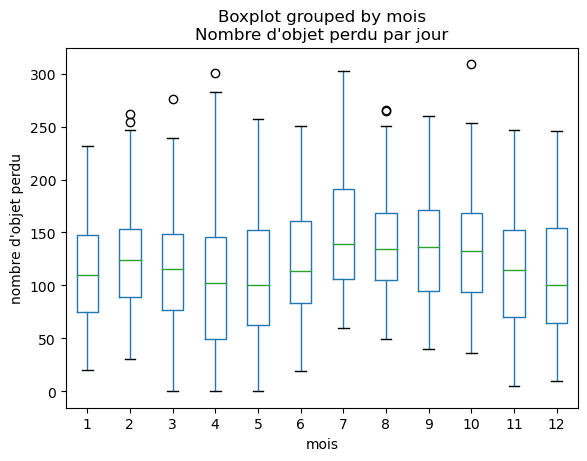

In [330]:
df_mois.boxplot('nombre_objet_perdu_par_jour', by='mois', grid=False)
plt.title( "Nombre d'objet perdu par jour" )
plt.ylabel("nombre d'objet perdu")
plt.xlabel('mois')

plt.show()

In [331]:
liste_df = []
for i in range(1,13):
    liste_df.append(df_mois[df_mois["mois"]==i]["nombre_objet_perdu_par_jour"])

In [332]:
f_statistic, p_value = f_oneway(*liste_df)

In [333]:
print(f"F-statistic: {f_statistic:.3f}, p-value: {p_value:.16f}")

F-statistic: 15.892, p-value: 0.0000000000000000


In [334]:
df_mois_type=pd.DataFrame(merge[["date","type_objet","departement"]].groupby([pd.Grouper(key='date', freq='D'),"type_objet"]).count().reset_index())
df_mois_type.rename(columns = {'departement':'nombre_objet_perdu_par_jour'}, inplace = True)

In [335]:
df_mois_type["mois"] = df_mois_type['date'].dt.month

In [336]:
df_mois_type = pd.DataFrame(df_mois_type[["mois","type_objet","nombre_objet_perdu_par_jour"]].groupby(["mois","type_objet"]).sum().reset_index())

In [337]:
df_mois_type

,mois,type_objet,nombre_objet_perdu_par_jour
0,1,"Appareils électroniques, informatiques, appare...",3106
1,1,"Articles d'enfants, de puériculture",242
2,1,"Articles de sport, loisirs, camping",205
3,1,Articles médicaux,95
4,1,"Bagagerie: sacs, valises, cartables",7147
...,...,...,...
187,12,Parapluies,241
188,12,Pièces d'identités et papiers personnels,1345
189,12,"Porte-monnaie / portefeuille, argent, titres",2118
190,12,"Vélos, trottinettes, accessoires 2 roues",288


In [338]:
contingency_table = pd.crosstab(df_mois_type['type_objet'], df_mois_type['mois'],values=df_mois_type['nombre_objet_perdu_par_jour'],aggfunc='sum')

In [339]:
contingency_table

mois,1,2,3,4,5,6,7,8,9,10,11,12
type_objet,,,,,,,,,,,,
"Appareils électroniques, informatiques, appareils photo",3106,3173,3167,2722,2863,3334,3951,3517,3511,3535,2976,2913
"Articles d'enfants, de puériculture",242,281,229,256,243,243,428,454,222,297,212,247
"Articles de sport, loisirs, camping",205,211,194,182,211,301,639,745,333,241,207,160
Articles médicaux,95,83,99,81,104,113,144,145,124,127,104,101
"Bagagerie: sacs, valises, cartables",7147,7197,6883,5628,5713,6009,8321,7809,7075,8041,7079,7453
"Bijoux, montres",201,201,180,145,178,182,257,210,222,231,173,188
"Clés, porte-clés, badge magnétique",953,898,936,757,909,977,1071,861,1062,1053,869,782
Divers,440,399,401,355,352,443,616,618,520,560,415,409
Instruments de musique,39,43,56,53,44,49,101,84,69,53,48,59


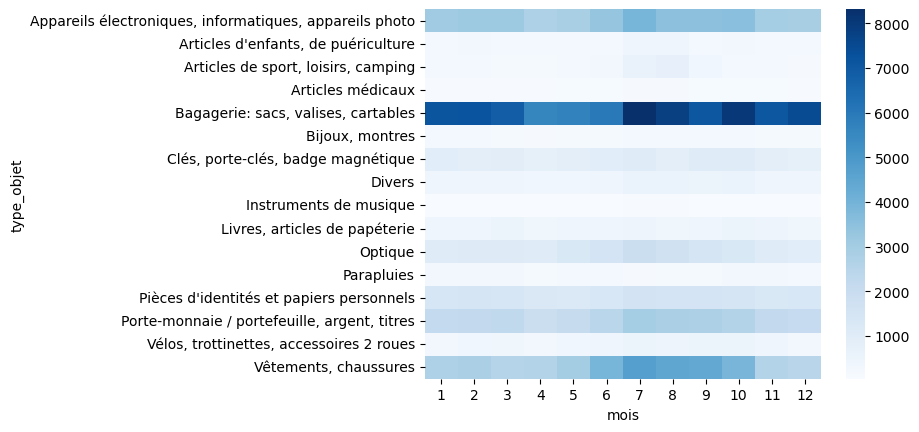

In [343]:
# Création du heatmap
sns.heatmap(contingency_table, cmap='Blues')

# Affichage du heatmap
plt.show()

In [341]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [342]:
print(f"chi2: {chi2:.3f}, p-value: {p:.3f}")

chi2: 3295.897, p-value: 0.000
